In [1]:
root_path = "/Users/danieldubovski/projects/deep_query_optimization"

import sys
import os
sys.path.insert(0, root_path)

In [2]:
# import tkinter
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib as mpl

plt_backend = mpl.get_backend()
print(plt_backend)
from matplotlib import pyplot as plt
import pandas as pd
from pandas import Panel
import numpy as np
import pytorch_lightning as pl
import torch
from importlib import reload 
from tqdm.auto import tqdm
from collections import Counter
import sklearn
import seaborn as sns
from sklearn import metrics as skm
import json
from dqo.estimator import evaluate as ge
from dqo.estimator.gerelt.v20 import evaluate as ge20
from dqo.estimator.gerelt import v15, v20
from dqo import datasets

mpl.use(plt_backend)

module://ipykernel.pylab.backend_inline


/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  # Remove the CWD from sys.path while we load stuff.


# TPCH

In [3]:
from collections import defaultdict
metas = [
    (v15, 'v15_tpch' , os.path.join(os.getcwd(), 'v15/logs/tpch_e/version_1/checkpoints/epoch=212-step=3737723.ckpt')),
    (v20, 'v20_tpch'  , os.path.join(os.getcwd(), 'v20/logs/tpch/version_3/checkpoints/epoch=161-step=2842775.ckpt')),
    (v15, 'v15_two' ,os.path.join(os.getcwd(), 'v15/logs/two_e/version_1/checkpoints/epoch=131-step=5679959.ckpt')),
    (v20, 'v20_two', os.path.join(os.getcwd(), 'v20/logs/two/version_3/checkpoints/epoch=203-step=8776079.ckpt')),
]

r = defaultdict(dict)
for meta in metas:
    version, label, checkpoint = meta
    for ds_name in ['tpcd', 'tpch', 'tpcds']:
        ds = datasets.ExtendedQueriesDataset(f'{ds_name}:extended')

        estimater = ge20.QueryEstimater(
            checkpoint, 
            dataset=ds, 
            encoder=version.encoder, 
            model_cls=version.model.GereltRegressor
        )

        results = estimater.evaluate(bucketed=False)
        bucketed = estimater.evaluate(bucketed=True)
        
        r[label][ds_name] = {'results': results, 'bucketed': bucketed}
        print(f'df: {ds_name} v: {str(version.__name__)}, :: ', json.dumps(ge.evaluate_metrics(results)), ' bucketed: ',json.dumps(ge.evaluate_metrics(bucketed)))

/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
  1%|▏         | 26/1809 [00:11<12:15,  2.42it/s]/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:227: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 135/135 [01:02<00:00,  2.16it/s]
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid v

df: tpcd v: dqo.estimator.gerelt.v15, ::  {"accuracy": 0.2377003869541183, "balanced accuracy": 0.06349074761023835, "kappa": 0.11450318544591276, "recall": 0.12202257588459844, "f1 macro": 0.11828355369270255, "f1 weighted": 0.21498213260065727, "mae": 10.063321580625606, "mean_rounded_two_sided_error": [[0.0, 4.052005778722812], [0.0, 3.4395085511708716], [-0.4429530787653817, 3.9657494379519043], [-0.4341351687823708, 2.1439731070678993], [-0.4486947592034503, 1.3173700455706303], [-0.6380707634674536, 1.1491925986381393], [-1.713806969091569, 1.5802543030982208], [-2.469573477044869, 1.3101670297726453], [-3.061734097787301, 1.133928552857644], [-1.8558943072356704, 0.5981195989959854], [-3.342675134744609, 0.35788038909889835], [-3.325514530543578, 0.40645196012201507], [-3.041984674396369, 1.6331645937643877], [-4.198777351917125, 0.0], [-7.300621462833955, 0.0], [-9.15203178456516, 0.0]], "bucket_errors": [[0, 1, 3, 3, 0, 2, 0, 2, 0], [1, 2, 2, 3, 1, 0, 1, 1, 0], [0, 6, 3, 3, 3,

100%|██████████| 652/652 [03:36<00:00,  3.02it/s]
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


df: tpch v: dqo.estimator.gerelt.v15, ::  {"accuracy": 0.7420016406890895, "balanced accuracy": 0.6259578882290825, "kappa": 0.689327842874444, "recall": 0.6493355202147648, "f1 macro": 0.6623235894713224, "f1 weighted": 0.7389469924010075, "mae": 1.351527005947626, "mean_rounded_two_sided_error": [[-0.11439739069231525, 2.7520149160355687], [-0.3441648020895152, 2.3358477816803487], [-0.309356276920572, 1.9809595731696925], [-0.21579732548867034, 1.0716887868631242], [-0.24100695843532216, 0.4283810709197759], [-0.1697915059472377, 0.3495182114060674], [-0.33307225980474675, 0.28680359058902016], [-0.6943306088105047, 0.4223477419717965], [-0.670837408177247, 0.24851617654961927], [-0.8113247876046301, 0.2604573310732299], [-0.8792181810886179, 0.2997758272988062], [-0.4208772328036523, 0.14216869153343922], [-0.6162855296385943, 0.0478901845132644], [-0.4206346137941061, 0.12651753051403838], [-1.5499829674882064, 0.019556886917011282], [-0.031827212488919066, 0.02914112285876477]], 

100%|██████████| 320/320 [03:07<00:00,  1.71it/s]


df: tpcds v: dqo.estimator.gerelt.v15, ::  {"accuracy": 0.1344632768361582, "balanced accuracy": 0.011117354629100053, "kappa": 0.005167888741578475, "recall": 0.06928692200385887, "f1 macro": 0.055782015504573686, "f1 weighted": 0.11812637285762978, "mae": 3.2823186914525713, "mean_rounded_two_sided_error": [[0.0, 4.564070372416945], [0.0, 3.8585871376594567], [-0.6029668974205089, 2.7083591855162776], [-1.1681627061937183, 2.585764791309307], [-1.3917921577910317, 1.8506876918120978], [-1.060268583492243, 1.37837039890125], [-1.0763294654272346, 1.1524941376668014], [-1.5321714069280332, 0.9841983491823059], [-2.281896235722484, 0.6216075549513547], [-3.212479888456905, 0.8695651281882382], [-3.8759412945446994, 0.0], [-5.25767589279463, 0.0], [-6.679456094365584, 0.0], [-6.913680799531046, 0.0], [-9.744294191119922, 0.0], [-9.367665398258582, 0.0], [-10.719288790793353, 0.0]], "bucket_errors": [[0, 1, 0, 1, 2, 0, 0, 0, 1], [4, 2, 10, 7, 9, 2, 0, 4, 1], [4, 15, 9, 6, 4, 3, 1, 1, 0], 

100%|██████████| 135/135 [00:44<00:00,  3.04it/s]


df: tpcd v: dqo.estimator.gerelt.v20, ::  {"accuracy": 0.28745163073521285, "balanced accuracy": 0.0977120811621291, "kappa": 0.1743689066004782, "recall": 0.15410507608949603, "f1 macro": 0.1485988373869359, "f1 weighted": 0.26597865009753785, "mae": 9.728377474050804, "mean_rounded_two_sided_error": [[0.0, 4.6400598870029395], [-0.049225386389374126, 4.690289887393457], [0.0, 3.3536532559616252], [-0.45476390422968055, 1.9650340192390676], [-0.5465299900644365, 0.891750230710383], [-0.5449013964051704, 0.7389927590340445], [-1.5480628813438526, 1.5823483326125436], [-1.803664844322996, 0.8803964108283612], [-2.1371685071707462, 0.8500886678211237], [-1.5670071059407873, 0.3663397606554686], [-2.2997765503723877, 0.27430810974344144], [-3.5203476571338155, 0.3173508202347577], [-3.83677402740685, 0.0], [-3.6283614986176906, 0.0], [-6.60897062086921, 0.0], [-9.802139236268797, 0.0]], "bucket_errors": [[0, 0, 3, 2, 3, 0, 1, 1, 1], [1, 0, 1, 2, 1, 1, 1, 1, 1], [3, 4, 6, 2, 5, 3, 0, 2, 0]

 46%|████▌     | 1118/2438 [06:43<05:43,  3.84it/s]

4 NestedLoopOp() 'supplier'


100%|██████████| 652/652 [02:35<00:00,  4.19it/s]


df: tpch v: dqo.estimator.gerelt.v20, ::  {"accuracy": 0.7616899097621, "balanced accuracy": 0.6491936882581937, "kappa": 0.7114066338590779, "recall": 0.6711190827420566, "f1 macro": 0.6850521948297832, "f1 weighted": 0.7575344475312565, "mae": 0.939871243264218, "mean_rounded_two_sided_error": [[0.0, 1.82087446929154], [-0.5915213819255761, 2.3906486887965244], [-0.2838569140614999, 1.1085568826326861], [-0.21221033196674577, 0.7686907322234074], [-0.33900278507722215, 0.43001097370822244], [-0.16037391061324466, 0.2081174405207515], [-0.3134577588028696, 0.1892729677857779], [-0.467227355849731, 0.47809262327244423], [-0.6758724835798534, 0.2953612711969744], [-0.8309830359969965, 0.18288099839458602], [-0.6488315744375119, 0.12627064243196803], [-0.3133287497067749, 0.13259716019458176], [-0.33080270259721006, 0.2055031820174673], [-0.22065645852280508, 0.10218957666619806], [-0.9184256077420109, 0.017241704302763842], [-0.021878218316512266, 0.022525475507774013]], "bucket_errors"

  8%|▊         | 284/3540 [02:46<28:15,  1.92it/s]

9 NestedLoopOp() 'income_band'


 48%|████▊     | 1698/3540 [17:36<15:44,  1.95it/s]

13 NestedLoopOp() 'customer'
16 NestedLoopOp() 'promotion'


 79%|███████▊  | 2779/3540 [29:31<05:25,  2.34it/s]

5 NestedLoopOp() 'web_returns'


 57%|█████▋    | 182/320 [01:54<01:46,  1.29it/s]

9 NestedLoopOp() 'income_band'


 87%|████████▋ | 279/320 [02:47<00:17,  2.34it/s]

13 NestedLoopOp() 'customer'
16 NestedLoopOp() 'promotion'


100%|██████████| 320/320 [03:00<00:00,  1.78it/s]


df: tpcds v: dqo.estimator.gerelt.v20, ::  {"accuracy": 0.062146892655367235, "balanced accuracy": 0.007556217602590213, "kappa": -0.020569873754756385, "recall": 0.06593526362596726, "f1 macro": 0.033203957992428326, "f1 weighted": 0.045255941603932835, "mae": 3.4942022013905873, "mean_rounded_two_sided_error": [[0.0, 4.278210726048486], [-0.004881811516831647, 3.268148970028681], [-0.16397457212045463, 2.273936641924494], [-0.615209436394648, 1.2229557964795306], [-0.7665570033961768, 0.8948587548739311], [-1.2873449105374415, 1.2355435062086388], [-1.6365325359854952, 1.8840089653179264], [-2.1366477496374294, 2.189290197113981], [-2.919449789172584, 1.8556668487070904], [-3.818660771384391, 2.435754932019862], [-4.7897068131820335, 0.6759046013756889], [-6.310704679135901, 0.0], [-6.971919213004372, 0.0], [-8.16233853296068, 0.0], [-11.162223252799901, 0.0], [-9.943506637023601, 0.0], [-9.96026936758032, 0.0]], "bucket_errors": [[0, 1, 1, 1, 0, 1, 0, 0, 1], [3, 4, 16, 7, 3, 1, 2, 3

100%|██████████| 135/135 [00:54<00:00,  2.47it/s]


df: tpcd v: dqo.estimator.gerelt.v15, ::  {"accuracy": 0.205085682697623, "balanced accuracy": 0.07715823291095637, "kappa": 0.08561407652836328, "recall": 0.1348358433540216, "f1 macro": 0.14391058753536806, "f1 weighted": 0.19220833350995437, "mae": 9.085599231728223, "mean_rounded_two_sided_error": [[0.0, 4.108894587081282], [-0.38888220644579796, 4.262319103537185], [0.0, 3.548269160714461], [-0.4526119291929614, 1.894639479000042], [-0.5066049628117033, 1.4842851020191454], [-0.7056495431012575, 1.617891278738151], [-1.7105192486314948, 1.809199233769761], [-2.5565405876431373, 1.4721894337489319], [-3.409945352187965, 1.3135769163775999], [-2.2503577084938136, 0.7349748031159951], [-3.539052023209092, 0.46606224649630656], [-3.6364246593072145, 1.5432320194209326], [-2.9149141732733854, 0.0], [-2.790401234748586, 0.0], [-6.649799674886758, 0.0], [-8.915473363823807, 0.0]], "bucket_errors": [[1, 1, 3, 1, 1, 1, 2, 0, 0], [2, 0, 3, 0, 0, 1, 2, 1, 1], [2, 6, 4, 4, 2, 2, 3, 1, 0], [45

100%|██████████| 652/652 [03:57<00:00,  2.74it/s]


df: tpch v: dqo.estimator.gerelt.v15, ::  {"accuracy": 0.7022149302707137, "balanced accuracy": 0.5840275266239999, "kappa": 0.6391649363794543, "recall": 0.6100258062099999, "f1 macro": 0.6196851269448074, "f1 weighted": 0.6966516990111221, "mae": 1.5329614591587608, "mean_rounded_two_sided_error": [[0.0, 2.709407834958926], [-0.28782623359654735, 2.546308869899411], [-0.2988204880272937, 2.194857666770086], [-0.28998486456445594, 1.1337631588920143], [-0.3454408234788555, 0.45252958213269634], [-0.19121996622960868, 0.3489282500230705], [-0.35246280926591017, 0.3493483692113029], [-0.6551366738445228, 0.8533749936898832], [-0.94776334332818, 0.38738762627545725], [-0.8094364697976293, 0.5246118266160646], [-0.9524262998211178, 0.48114621299034055], [-0.9478574873466935, 0.18554786634309375], [-1.1695798419653827, 0.18818137761123532], [-1.4000183722960011, 0.09915205751520118], [-1.5365816411419972, 0.04705807094975542], [-0.029226148062447166, 0.038429059820998646]], "bucket_errors"

100%|██████████| 320/320 [03:02<00:00,  1.75it/s]


df: tpcds v: dqo.estimator.gerelt.v15, ::  {"accuracy": 0.6666666666666666, "balanced accuracy": 0.4189587261341156, "kappa": 0.5917127820817312, "recall": 0.4531376245968147, "f1 macro": 0.4698836517232415, "f1 weighted": 0.6620021263899981, "mae": 1.2098043060789896, "mean_rounded_two_sided_error": [[0.0, 3.532364353089188], [-0.29550576830014563, 1.8731853558923701], [-0.4035103333427879, 1.526569013237962], [-0.51111258602553, 1.1769622565169349], [-0.6093655915955823, 0.6221512323956314], [-0.4530635911704453, 0.7085253785378389], [-0.3189588087994812, 0.5424138280822315], [-0.366465470333692, 0.37139402797508364], [-0.4167929471755516, 0.2217405148190904], [-0.6051407756590557, 0.16583011588481292], [-1.4131825783746172, 0.14402723113303362], [-2.3899590480280737, 0.1416693439581654], [-2.0177844665040747, 0.10968301282961072], [-2.9586787626332987, 0.403050948368449], [-1.2950639589798314, 0.0076869031735005144], [-1.4298309858237175, 0.15486592972720103], [-4.9756316845216215, 

100%|██████████| 135/135 [00:37<00:00,  3.63it/s]


df: tpcd v: dqo.estimator.gerelt.v20, ::  {"accuracy": 0.2924267551133223, "balanced accuracy": 0.09742457033121012, "kappa": 0.18038229853436405, "recall": 0.15383553468550948, "f1 macro": 0.15172650268940158, "f1 weighted": 0.2713401934841604, "mae": 10.112280310919923, "mean_rounded_two_sided_error": [[0.0, 5.514526686269044], [-0.4294534536680308, 4.345281529876753], [0.0, 3.447071083815902], [-0.4174478520039683, 1.8229433672989956], [-0.4160672392590041, 1.0655047138207225], [-0.586154261917603, 1.0579458354317655], [-1.306146275561867, 1.3802917164869974], [-1.9148179789021473, 1.0982095504902318], [-2.4105208399635423, 0.902251256633345], [-1.547946512279563, 0.6479069421413657], [-2.0261801634059786, 0.5409841806547863], [-3.602195349646098, 0.5252696894422333], [-3.440793996582627, 0.0], [-4.893232017241755, 0.0], [-6.169593122162838, 0.0], [-8.342142357481027, 0.0]], "bucket_errors": [[0, 0, 1, 1, 1, 5, 1, 1, 0], [1, 0, 2, 2, 2, 1, 1, 0, 0], [0, 4, 6, 9, 3, 0, 1, 2, 0], [48,

 46%|████▌     | 1118/2438 [06:19<05:39,  3.89it/s]

4 NestedLoopOp() 'supplier'


100%|██████████| 652/652 [02:26<00:00,  4.44it/s]


df: tpch v: dqo.estimator.gerelt.v20, ::  {"accuracy": 0.7337981952420016, "balanced accuracy": 0.6132303077790496, "kappa": 0.6795913218051209, "recall": 0.637403413542859, "f1 macro": 0.6478435190125076, "f1 weighted": 0.7311265541280648, "mae": 1.2989229688885113, "mean_rounded_two_sided_error": [[0.0, 2.542626415613791], [-0.2918587011706621, 2.5269710556383744], [-0.2640342341561809, 1.4325699128395684], [-0.18437821217662034, 1.0517019250327717], [-0.3146672215143625, 0.5830823737704074], [-0.18494449536036703, 0.24425303704800638], [-0.3093224657419602, 0.27796925468511563], [-0.48306644768067597, 0.5049394460963677], [-0.5886096815434562, 0.41824731132503123], [-1.0655084832333117, 0.3379362562772878], [-0.5039564380744657, 0.2043814209910813], [-0.445931674629123, 0.15140010812767257], [-0.45090250996748765, 0.2879881129924226], [-0.1675661863502849, 0.3309955437565119], [-1.2875871792396798, 0.03380780538914386], [-0.02441529873924401, 0.04626513592016779]], "bucket_errors": 

  8%|▊         | 284/3540 [02:36<26:51,  2.02it/s]

9 NestedLoopOp() 'income_band'


 48%|████▊     | 1699/3540 [15:48<11:14,  2.73it/s]

13 NestedLoopOp() 'customer'
16 NestedLoopOp() 'promotion'


 79%|███████▊  | 2779/3540 [25:40<04:29,  2.83it/s]

5 NestedLoopOp() 'web_returns'


 57%|█████▋    | 182/320 [01:32<01:27,  1.57it/s]

9 NestedLoopOp() 'income_band'


 88%|████████▊ | 281/320 [02:15<00:11,  3.44it/s]

13 NestedLoopOp() 'customer'
16 NestedLoopOp() 'promotion'


100%|██████████| 320/320 [02:26<00:00,  2.19it/s]


df: tpcds v: dqo.estimator.gerelt.v20, ::  {"accuracy": 0.6951977401129944, "balanced accuracy": 0.566257598499601, "kappa": 0.6283099657022171, "recall": 0.5917718574113892, "f1 macro": 0.605030841944434, "f1 weighted": 0.6933579539997715, "mae": 0.9420056762305572, "mean_rounded_two_sided_error": [[0.0, 1.4767723987778072], [-0.22170878869694308, 1.1752130476069031], [-0.3151536454788731, 0.9785736175255656], [-0.44049533667497487, 0.6052622544059941], [-0.412205460464901, 0.4988062049616378], [-0.3797775150554255, 0.48513030006808355], [-0.3361842593042062, 0.5150607351670166], [-0.3555533538641485, 0.3056014446247231], [-0.3761029736569119, 0.2210744418113588], [-0.5398461018394487, 0.2245828072048221], [-1.065881597753632, 0.28298964047085334], [-1.3494204372737035, 0.1283099313948508], [-1.1135130518125702, 0.10905225759785575], [-1.971803972432517, 0.24645567598285711], [-1.5154149516050939, 0.014345866460976353], [-0.01733573052752435, 0.02892855636871916], [-6.720250264069877,

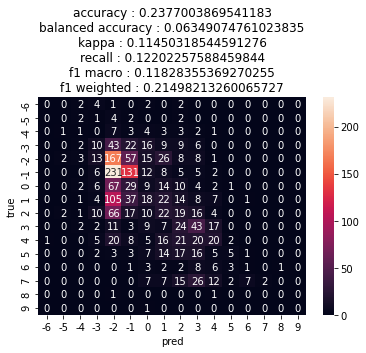

              precision    recall  f1-score   support

          -6       0.00      0.00      0.00        11
          -5       0.00      0.00      0.00        11
          -4       0.06      0.04      0.05        25
          -3       0.16      0.09      0.11       117
          -2       0.23      0.56      0.33       300
          -1       0.42      0.33      0.37       400
           0       0.08      0.06      0.07       144
           1       0.15      0.10      0.12       217
           2       0.13      0.11      0.12       167
           3       0.27      0.36      0.31       118
           4       0.26      0.17      0.20       118
           5       0.38      0.07      0.12        73
           6       0.10      0.04      0.05        27
           7       1.00      0.03      0.05        78
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.24      1809
   macro avg       0.20   

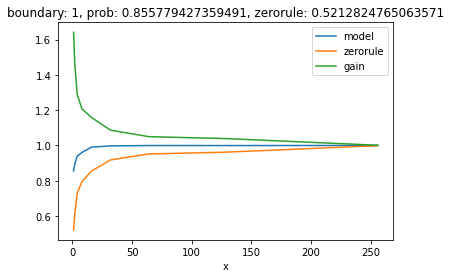

In [4]:
ge.display_results(r['v15_tpch']['tpcd']['results'])

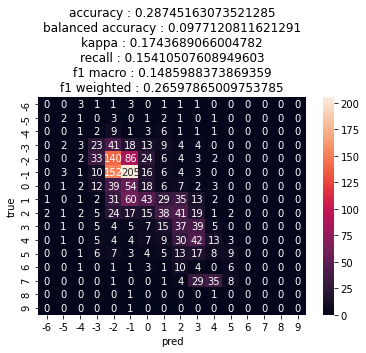

              precision    recall  f1-score   support

          -6       0.00      0.00      0.00        11
          -5       0.18      0.18      0.18        11
          -4       0.06      0.04      0.05        25
          -3       0.22      0.20      0.21       117
          -2       0.31      0.47      0.37       300
          -1       0.45      0.51      0.48       400
           0       0.12      0.12      0.12       144
           1       0.22      0.13      0.17       217
           2       0.21      0.25      0.23       167
           3       0.22      0.33      0.26       118
           4       0.18      0.11      0.14       118
           5       0.32      0.12      0.18        73
           6       0.00      0.00      0.00        27
           7       0.00      0.00      0.00        78
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.29      1809
   macro avg       0.16   

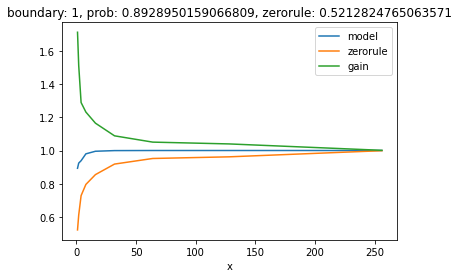

In [5]:
ge.display_results(r['v20_tpch']['tpcd']['results'])

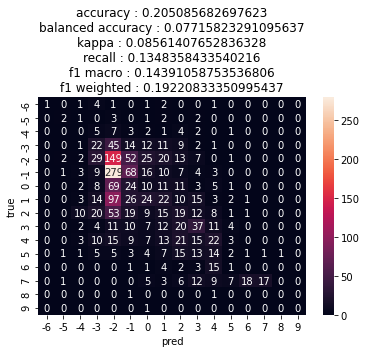

              precision    recall  f1-score   support

          -6       1.00      0.09      0.17        11
          -5       0.29      0.18      0.22        11
          -4       0.00      0.00      0.00        25
          -3       0.17      0.19      0.18       117
          -2       0.20      0.50      0.29       300
          -1       0.30      0.17      0.22       400
           0       0.08      0.07      0.07       144
           1       0.17      0.10      0.13       217
           2       0.14      0.11      0.12       167
           3       0.29      0.31      0.30       118
           4       0.24      0.19      0.21       118
           5       0.09      0.03      0.04        73
           6       0.00      0.00      0.00        27
           7       0.94      0.22      0.35        78
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.21      1809
   macro avg       0.24   

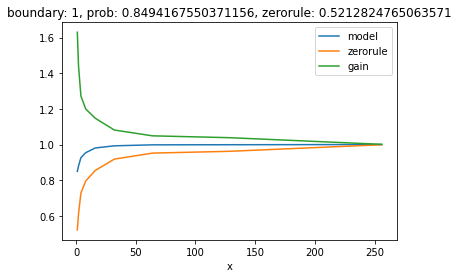

In [6]:
ge.display_results(r['v15_two']['tpcd']['results'])

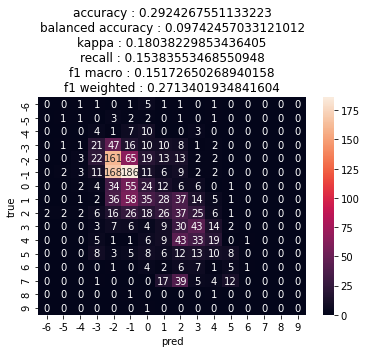

              precision    recall  f1-score   support

          -6       0.00      0.00      0.00        11
          -5       0.17      0.09      0.12        11
          -4       0.00      0.00      0.00        25
          -3       0.24      0.18      0.20       117
          -2       0.34      0.54      0.41       300
          -1       0.43      0.47      0.45       400
           0       0.15      0.17      0.16       144
           1       0.20      0.13      0.16       217
           2       0.15      0.22      0.18       167
           3       0.28      0.36      0.32       118
           4       0.28      0.16      0.20       118
           5       0.27      0.11      0.16        73
           6       0.50      0.04      0.07        27
           7       0.00      0.00      0.00        78
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.29      1809
   macro avg       0.19   

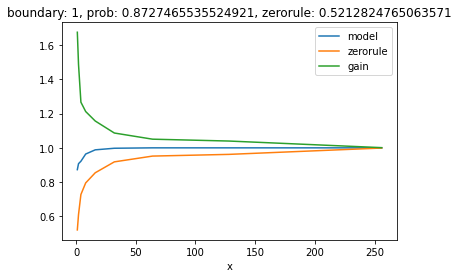

In [7]:
ge.display_results(r['v20_two']['tpcd']['results'])

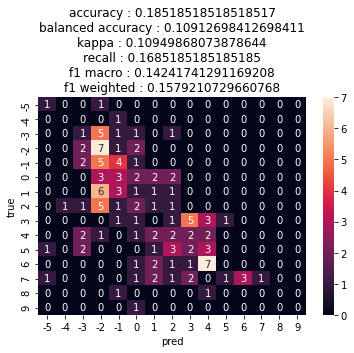

              precision    recall  f1-score   support

          -5       0.33      0.50      0.40         2
          -4       0.00      0.00      0.00         1
          -3       0.10      0.11      0.11         9
          -2       0.21      0.58      0.31        12
          -1       0.25      0.33      0.29        12
           0       0.14      0.17      0.15        12
           1       0.09      0.08      0.09        12
           2       0.08      0.08      0.08        12
           3       0.42      0.42      0.42        12
           4       0.12      0.17      0.14        12
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        12
           7       1.00      0.08      0.15        12
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.19       135
   macro avg       0.18      0.17      0.14       135
weighted avg       0.22   

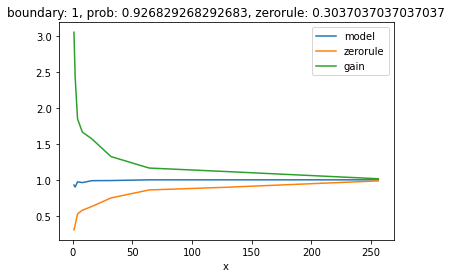

In [8]:
ge.display_results(r['v15_two']['tpcd']['bucketed'])

## TWO (15 vs 20)

/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


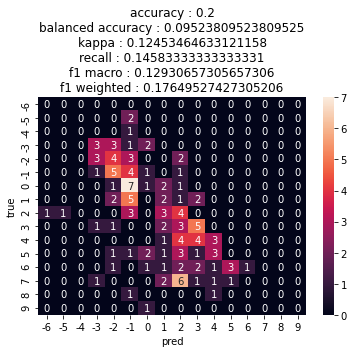

              precision    recall  f1-score   support

          -6       0.00      0.00      0.00         0
          -5       0.00      0.00      0.00         2
          -4       0.00      0.00      0.00         1
          -3       0.33      0.33      0.33         9
          -2       0.22      0.33      0.27        12
          -1       0.14      0.33      0.20        12
           0       0.12      0.08      0.10        12
           1       0.14      0.17      0.15        12
           2       0.15      0.33      0.21        12
           3       0.33      0.42      0.37        12
           4       0.33      0.25      0.29        12
           5       0.00      0.00      0.00        12
           6       1.00      0.08      0.15        12
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.20       135
   macro avg       0.17   

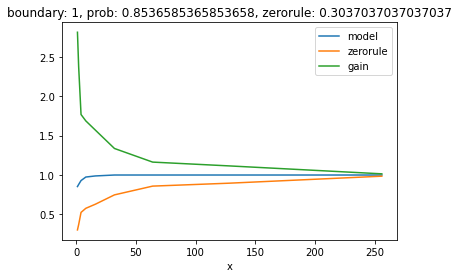

In [9]:
ge.display_results(r['v20_two']['tpcd']['bucketed'])

In [ ]:
from collections import defaultdict
metas = [
    (v15,  os.path.join(os.getcwd(), 'v15/logs/two_e/version_1/checkpoints/epoch=131-step=5679959.ckpt')),
    (v20,  os.path.join(os.getcwd(), 'v20/logs/two/version_3/checkpoints/epoch=203-step=8776079.ckpt')),
]

r = defaultdict(dict)
for meta in metas:
    version, checkpoint = meta
    for ds_name in ['tpcd', 'tpch', 'tpcds']:
        ds = datasets.ExtendedQueriesDataset(f'{ds_name}:extended')

        estimater = ge20.QueryEstimater(
            checkpoint, 
            dataset=ds, 
            encoder=version.encoder, 
            model_cls=version.model.GereltRegressor
        )

        results = estimater.evaluate()
        r[str(version.__name__)][ds_name] = results
        print(f'df: {ds_name} v: {str(version.__name__)}, :: ', json.dumps(ge.evaluate_metrics(results)))

# Trained on TPCH, Inference on IMDB

In [ ]:
imdb = datasets.QueriesDataset('imdb:optimized')
imdb_sample = imdb.sample(n=500, strategy='bucketed')

In [ ]:
v2_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v2/logs/tpch/version_0/checkpoints/epoch=48-step=881537.ckpt'), 
    dataset=imdb, 
    encoder=v2.encoder, 
    model_cls=v2.model.GereltRegressor
)
v3_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v3/logs/tpch/version_0/checkpoints/epoch=68-step=1254626.ckpt'), 
    dataset=imdb, 
    encoder=v3.encoder, 
    model_cls=v3.model.GereltRegressor
)
v4_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v4/logs/tpch/version_0/checkpoints/epoch=48-step=890966.ckpt'), 
    dataset=imdb, 
    encoder=v4.encoder, 
    model_cls=v4.model.GereltRegressor
)
v7_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v7/logs/tpch/version_2/checkpoints/epoch=108-step=1981946.ckpt'), 
    dataset=imdb, 
    encoder=v7.encoder, 
    model_cls=v7.model.GereltRegressor
)

In [ ]:
v2_results = v2_estimater.evaluate(df=imdb_sample)
print(json.dumps(ge.evaluate_metrics(v2_results)))
v3_results = v3_estimater.evaluate(df=imdb_sample)
print(json.dumps(ge.evaluate_metrics(v3_results)))
v4_results = v4_estimater.evaluate(df=imdb_sample)
print(json.dumps(ge.evaluate_metrics(v4_results)))
v7_results = v7_estimater.evaluate(df=imdb_sample)
print(json.dumps(ge.evaluate_metrics(v7_results)))

## NUMBERS VS STRINGS

In [ ]:
qe = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v2/logs/three_opt_default_adam/version_1/checkpoints/epoch=60.ckpt'), 
    dataset=imdb, 
    encoder=v2.encoder, 
    model_cls=v2.model.GereltRegressor
)
r = qe.evaluate(df=datasets.QueriesDataset('imdb:only_strings').load())
json.dumps(ge.evaluate_metrics(r))

In [ ]:
qe = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v2/logs/three_opt_default_adam/version_1/checkpoints/epoch=60.ckpt'), 
    dataset=imdb, 
    encoder=v2.encoder, 
    model_cls=v2.model.GereltRegressor
)
r = qe.evaluate(df=datasets.QueriesDataset('imdb:only_numbers').load())
json.dumps(ge.evaluate_metrics(r))

## RANDOM QUERIES

In [ ]:
v1_results.predict_query('select MIN(id) from aka_title')

In [ ]:
v1_results.predict_query('select MIN(id) from aka_title, cast_info where aka_title.movie_id = cast_info.movie_id and cast_info.note like "%a%"')

In [ ]:
v1_results.predict_query('select MIN(id) from aka_title, cast_info where aka_title.movie_id = cast_info.movie_id and aka_title.movie_id > 10')

In [ ]:
v1_results.predict_query('select MIN(id) from aka_title, cast_info where aka_title.movie_id = cast_info.movie_id')

In [ ]:
v1_results.predict_query('select MIN(id) from cast_info')

# overfitting

In [ ]:
import re

epoch_num_regex = re.compile("epoch=(\d.*)-")

In [ ]:
epoch_num_regex.search(cps[1])[1]

In [ ]:
cp_path = os.path.join(os.getcwd(), 'v7/logs/tpch/version_2/checkpoints/')
cps = [os.path.join(cp_path, f) for f in os.listdir(cp_path)]
cps = sorted(cps, key= lambda s: int(epoch_num_regex.search(s)[1]))

v = v7
for cp in tqdm(cps):
    qe = ge.QueryEstimater(cp, dataset=imdb, encoder=v.encoder, model_cls=v.model.GereltRegressor)
    r = qe.evaluate(df=imdb_sample)
    print(int(epoch_num_regex.search(cp)[1]), json.dumps(ge.evaluate_metrics(r)))

In [ ]:
cp_path = os.path.join(os.getcwd(), 'v4/logs/tpch/version_0/checkpoints/')
cps = [os.path.join(cp_path, f) for f in os.listdir(cp_path)]
cps = sorted(cps, key= lambda s: int(epoch_num_regex.search(s)[1]))
v = v4
for cp in tqdm(cps):
    qe = ge.QueryEstimater(cp, dataset=imdb, encoder=v.encoder, model_cls=v.model.GereltRegressor)
    r = qe.evaluate(df=imdb_sample)
    print(int(epoch_num_regex.search(cp)[1]), json.dumps(ge.evaluate_metrics(r)))